# 利用ncmaps 绘制一张海平面气压图

### 数据 
slp.mon.mean.nc (该数据在data中方便下载使用)



### Step1 查看ncl官方调色板对应的色号(以官方默认调色板为例)

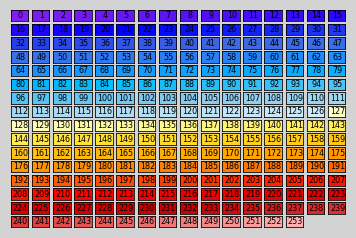

In [8]:
from ncmaps import Cmaps
%matplotlib inline
#本例中所选取ncl的官网调色板为ncl_default
#ncmaps 默认的调色板也是ncl_default
rgb_file = 'ncl_default'
#以下是核心api,实质为调用Cmaps基类的show()方法,该方法会创建一个新的进程绘制如下图片，
#注意此方法还可以替换成plot(),效果依然如图，只不过要手动关闭图片才能进一步执行后续代码
#由于查看调色板色号仅用于代码调试,故建议不使用时将下面代码注释如：#cmaps = Cmaps('NCV_blu_red').show()

cmaps = Cmaps(rgb_file).show()

#由于ncl_default为ncmaps默认的调色板，故上述代码也可以写成
#cmaps = Cmaps().show()



### Step２ 绘制全球的slp的contour

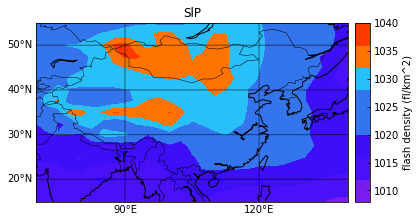

In [14]:
from netCDF4 import Dataset
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

from ncmaps import Cmaps
# 根据ncl官网额ncl_default自定义调色板
rgb_file = 'ncl_default'

self_define_list = [2,10,12,50,90,188,200]
cmaps = Cmaps(rgb_file,self_define_list).listmap()


# 获取数据
meteo_file = '../data/slp.mon.mean.nc'
fh = Dataset(meteo_file, mode='r')

# 获取每个变量的值
lon = fh.variables['lon'][:]
lat = fh.variables['lat'][:]
slp = fh.variables['slp'][:]
slp_units = fh.variables['slp'].units
#　所绘制slp的时次
slp_0 = slp[0, ::, ::]

levels = [1005,1010,1015,1020,1025,1030,1035,1040]
# 绘图
fig,ax = plt.subplots()
m = Basemap(llcrnrlat=15,urcrnrlat=55,llcrnrlon=70,urcrnrlon=140)

m.drawcoastlines() # 绘制海岸线
m.drawstates()    # 绘制美国州界
m.drawcountries()  # 绘制国界
# 绘制纬度线
parallels = np.arange(-90.,91,10.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# 绘制经度线
meridians = np.arange(-180.,181.,30.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

# 网格化经纬度，并进行投影转换坐标            
lons, lats = np.meshgrid(lon, lat)
x, y = m(lons, lats)

# 调色板的使用　默认时ncl的调色板
con = m.contourf(x, y, slp_0, cmap = cmaps, spacing = 'uniform')
# 添加标题
ax.set_title('SlP')

cax = m.colorbar(con, cmap = cmaps, ax = ax, spacing = 'uniform')
cax.set_ticks(levels)
cax.ax.tick_params(direction = 'in')
cax.set_label('flash density (fl/km^2)')

plt.show()


### 备注 如何查看ncmaps提供的ncl调色板

In [2]:
from ncmaps import Cmaps
#以下是核心api,实质为调用Cmaps基类的listmap()方法
print(Cmaps())

MPL_Greys.rgb
precip_diff_1lev.rgb
GMT_hot.rgb
seaice_2.rgb
uniform.rgb
MPL_coolwarm.rgb
BlueDarkOrange18.rgb
amwg256.rgb
precip3_16lev.rgb
GrayWhiteGray.rgb
detail.rgb
tbrVar1.rgb
MPL_PuBuGn.rgb
MPL_s3pcpn_l.rgb
cosam.rgb
cmp_flux.rgb
NCV_manga.rgb
MPL_spring.rgb
GMT_gebco.rgb
amwg.rgb
MPL_YlGnBu.rgb
MPL_gnuplot2.rgb
NCV_rainbow2.rgb
MPL_Oranges.rgb
GMT_paired.rgb
rh_19lev.rgb
GMT_no_green.rgb
MPL_PuBu.rgb
hotcolr_19lev.rgb
GMT_relief.rgb
radar.rgb
temp_diff_1lev.rgb
GreenYellow.rgb
ViBlGrWhYeOrRe.rgb
amwg_blueyellowred.rgb
gscyclic.rgb
CBR_drywet.rgb
NCV_blue_red.rgb
MPL_summer.rgb
testcmap.rgb
MPL_gist_stern.rgb
grads_default.rgb
tbrStd1.rgb
MPL_rainbow.rgb
wind_17lev.rgb
gsltod.rgb
NCV_gebco.rgb
NMCVel.rgb
tbr_var_0-500.rgb
sunshine_diff_12lev.rgb
MPL_BuGn.rgb
Cat12.rgb
MPL_gist_heat.rgb
MPL_PRGn.rgb
SVG_feb_sunrise.rgb
precip2_15lev.rgb
rainbow+white.rgb
NCV_jaisnd.rgb
MPL_terrain.rgb
ncview_default.rgb
GreenMagenta16.rgb
WhViBlGrYeOrReWh.rgb
MPL_Paired.rgb
posneg_1.rgb
nrl_sirkes